In [55]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [39]:
data_dir = "../Data_Cropped_and_Resized"

### Feature Extraction

In [42]:
train_path = f"{data_dir}/train"

train_imgs, train_sobel_edges, train_labels = extract_features(train_path, detect_edges_sobel)
_, train_hounsfield_edges, _ = extract_features(train_path, apply_hounsfield_units)
_, train_threshold_edges, _ = extract_features(train_path, threshold_image)

In [43]:
valid_path = f"{data_dir}/valid"

valid_imgs, valid_sobel_edges, valid_labels = extract_features(valid_path, detect_edges_sobel)
_, valid_hounsfield_edges, _ = extract_features(valid_path, apply_hounsfield_units)
_, valid_threshold_edges, _ = extract_features(valid_path, threshold_image)

### DecisionTree

##### Sobel edges features

Accuracy: 0.4305555555555556


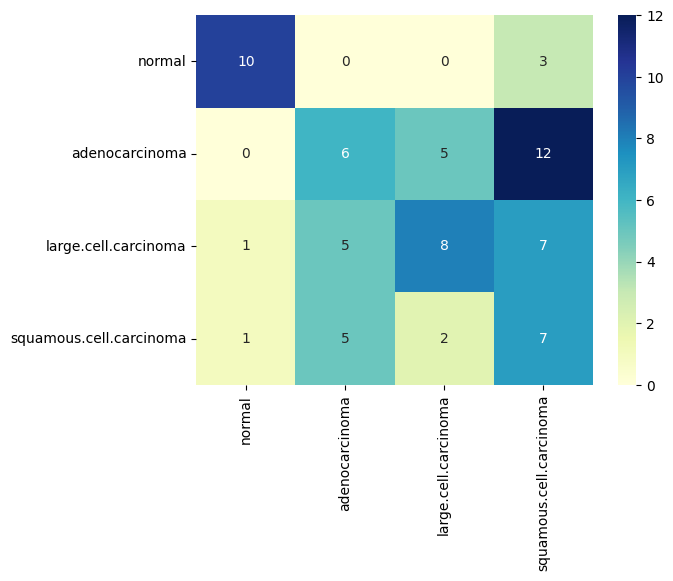

In [ ]:
clf = DecisionTreeClassifier()

X_train = np.array([img.flatten() for img in train_sobel_edges])
X_val = np.array([img.flatten() for img in valid_sobel_edges])
sobel_preds = classify_decision_tree(X_train, train_labels, X_val, valid_labels)

plot_confusion_matrix(valid_labels, sobel_preds)

##### Hounsfield features

Accuracy: 0.4027777777777778


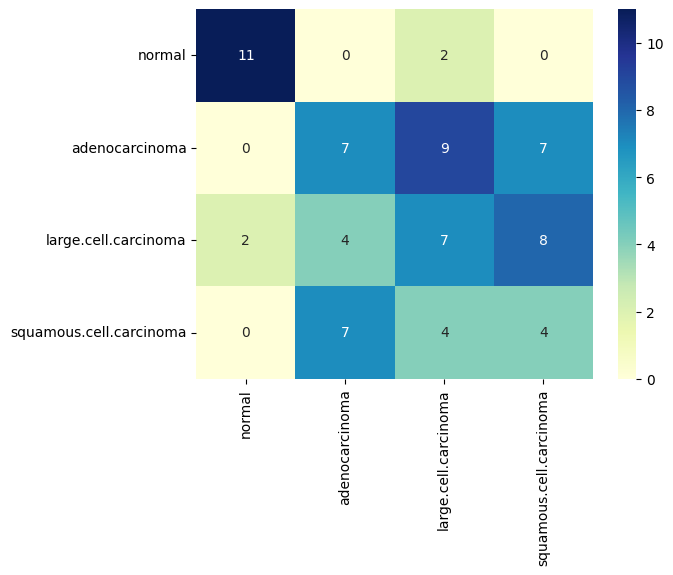

In [ ]:
X_train = np.array([img.flatten() for img in train_hounsfield_edges])
X_val = np.array([img.flatten() for img in valid_hounsfield_edges])
hounsfield_preds = classify_decision_tree(X_train, train_labels, X_val, valid_labels)

plot_confusion_matrix(valid_labels, hounsfield_preds)

##### Thresholded features

Accuracy: 0.3888888888888889


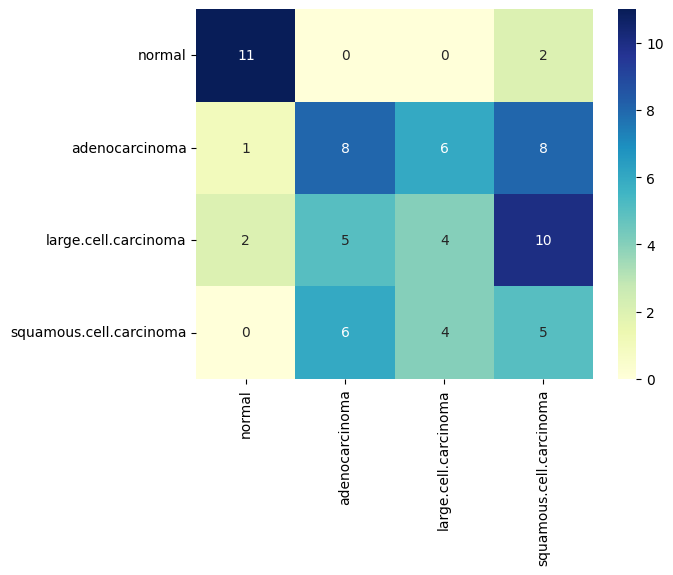

In [45]:
X_train = np.array([img.flatten() for img in train_threshold_edges])
X_val = np.array([img.flatten() for img in valid_threshold_edges])
thresh_preds = classify_decision_tree(X_train, train_labels, X_val, valid_labels)

plot_confusion_matrix(valid_labels, thresh_preds)

#### Combined features

Accuracy: 0.4583333333333333


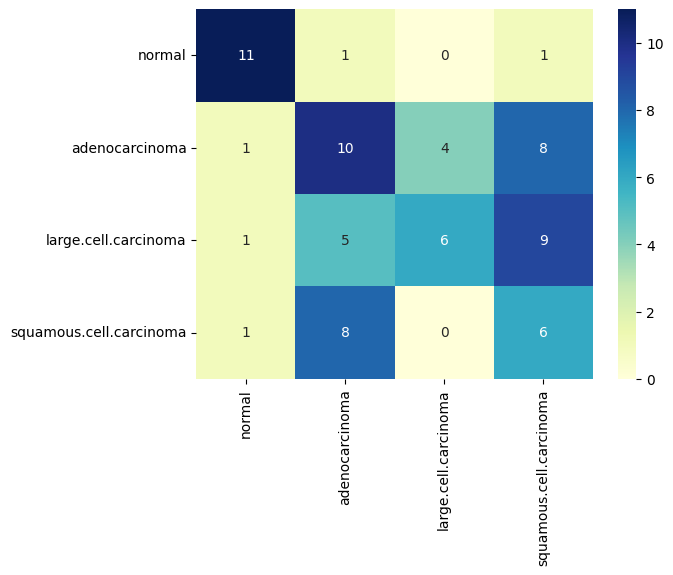

In [53]:
X_train = [np.array([x, y, z]).flatten() for x, y, z in zip(train_sobel_edges, train_hounsfield_edges, train_threshold_edges)]
X_val = [np.array([x, y, z]).flatten() for x, y, z in zip(valid_sobel_edges, valid_hounsfield_edges, valid_threshold_edges)]
combined_preds = classify_decision_tree(X_train, train_labels, X_val, valid_labels)

plot_confusion_matrix(valid_labels, combined_preds)

### Parameter search

In [57]:
# hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

dt_classifier = DecisionTreeClassifier()

X_train = [np.array([x, y, z]).flatten() for x, y, z in zip(train_sobel_edges, train_hounsfield_edges, train_threshold_edges)]
y_train = train_labels


In [58]:
# hyperparameter search on the training data
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [60]:
X_val = [np.array([x, y, z]).flatten() for x, y, z in zip(valid_sobel_edges, valid_hounsfield_edges, valid_threshold_edges)]
y_val = valid_labels

In [61]:
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.4305555555555556


In [62]:
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}